In [1]:
import pandas as pd
import matplotlib.pyplot as plt

reading1 = pd.read_csv('measure-breathing-pressure-2020-07-17.csv', skiprows=1, parse_dates=['Time'])
reading1['Time'] = pd.to_datetime(reading1['Time'])
# reading1.index = (reading1['Time'] - reading1['Time'][0]).astype('timedelta64[ms]')
reading1.index = reading1['Time'].astype('datetime64[ms]')

/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<Figure size 432x288 with 0 Axes>

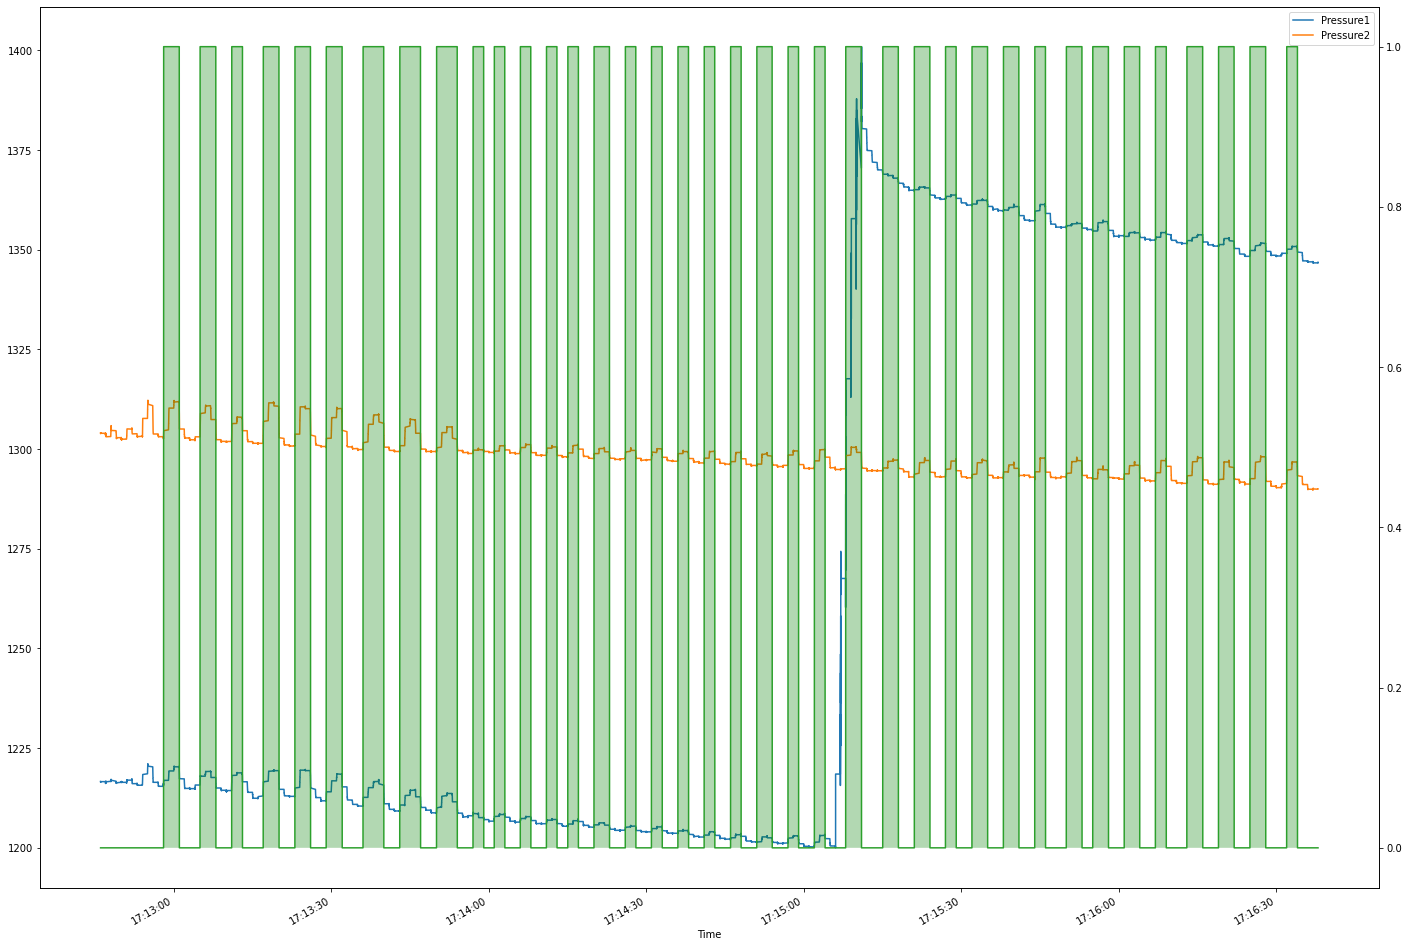

In [44]:
plt.figure()
ax = reading1[['Pressure1', 'Pressure2']].plot(kind='line', figsize=(24, 18), scaley=(1200,1400))
ax2 = reading1['Button'].plot.line(secondary_y=['Button'], stacked=False)
ax2.fill_between(reading1.index, 0, reading1['Button'], facecolor='green', alpha=0.3)

/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


(737623.7180655631, 737623.719065563)

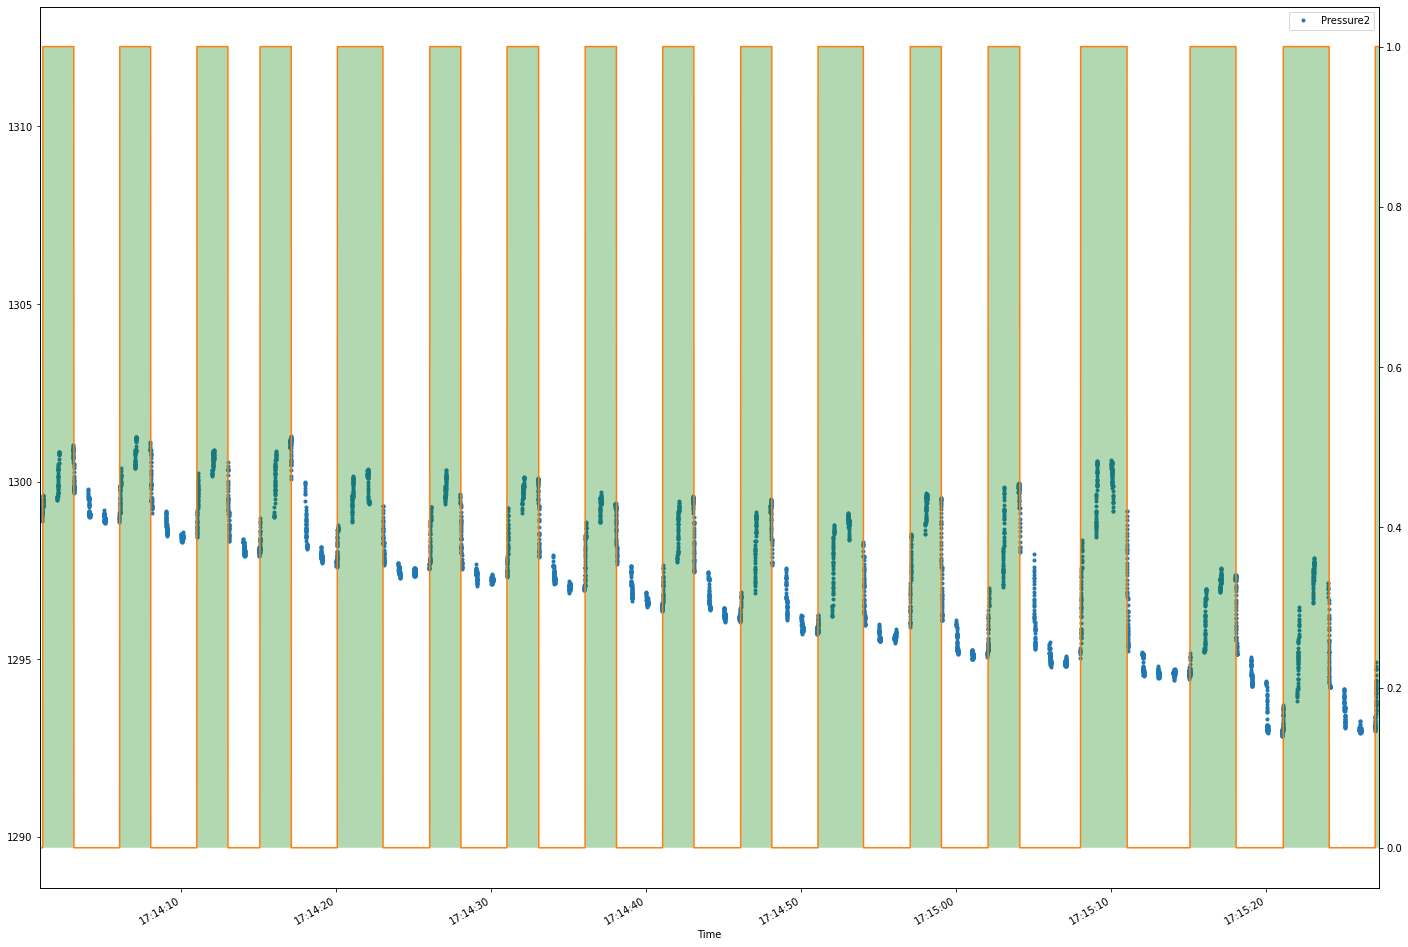

In [58]:
ax3 = reading1[['Pressure2']].rolling(2, win_type='triang').sum().plot(figsize=(24,18), style='.')
ax4 = reading1['Button'].plot.line(secondary_y=['Button'], stacked=False)
ax4.fill_between(reading1.index, 0, reading1['Button'], facecolor='green', alpha=0.3)
ax3.get_xlim()
start_time = 737623.7170655631
plt.xlim(start_time + 0.001, start_time+ 0.002)

/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


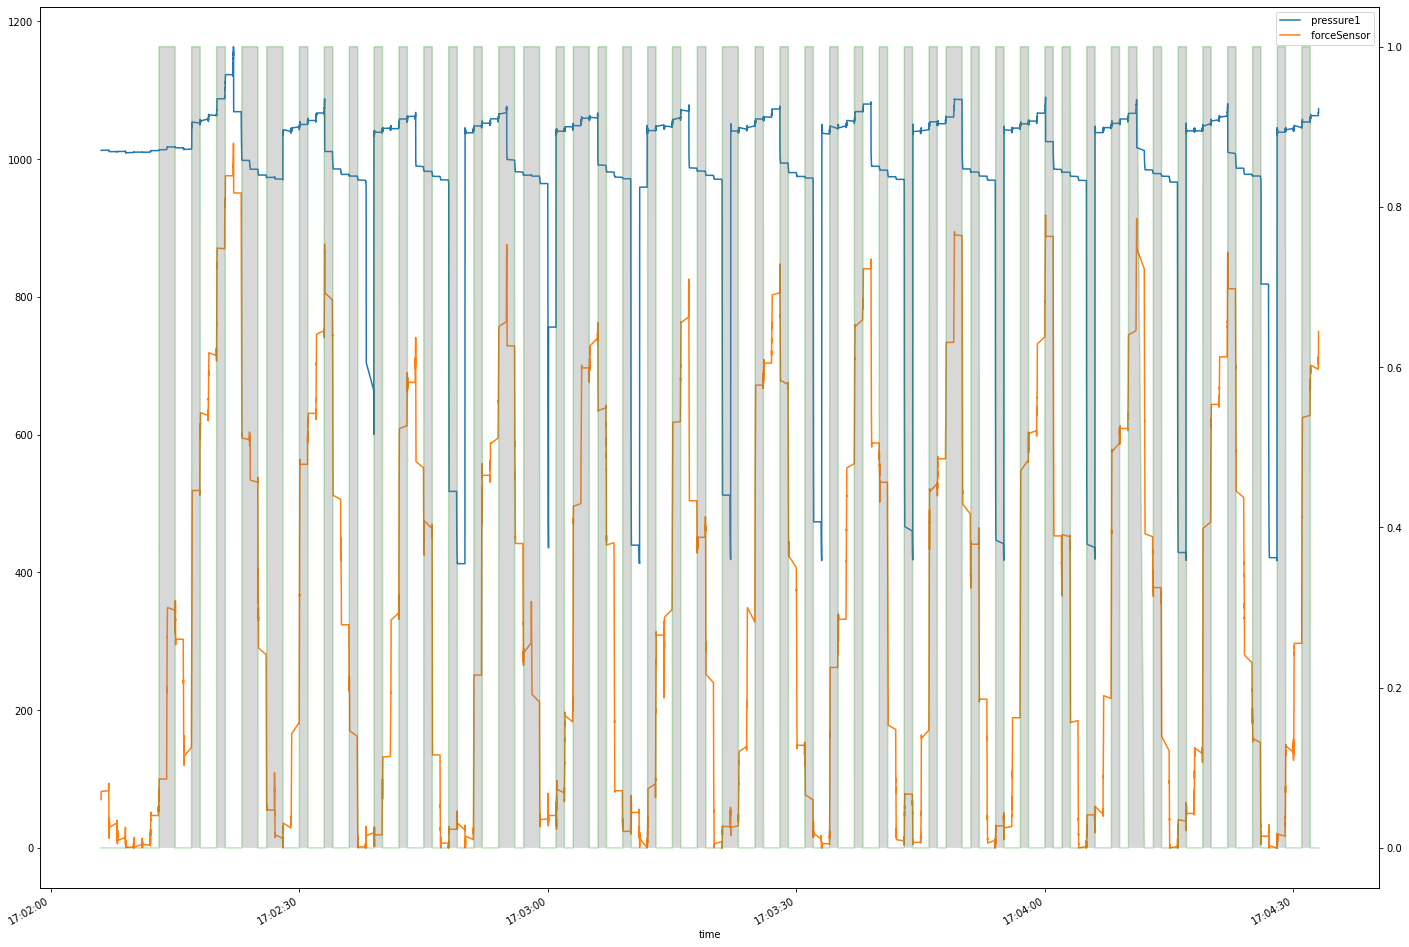

In [25]:
def create_graph(file_name, index_name, columns, secondary_column):
    hrvReadings = pd.read_csv(file_name)
    hrvReadings.index = pd.to_datetime(hrvReadings[index_name]).astype('datetime64[ms]')

    hrvAx1 = hrvReadings[columns].plot(kind='line', figsize=(24, 18))
    hrvAx2 = hrvReadings[secondary_column].plot.line(secondary_y=[secondary_column], stacked=False, alpha=0.3)
    hrvAx2.fill_between(hrvReadings.index, 0, hrvReadings[secondary_column], facecolor='grey', alpha=0.3)
    
create_graph(file_name='force-sensor-experiments/hrvBreathing-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure1', ' forceSensor'],
             secondary_column=' button'
             )

/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


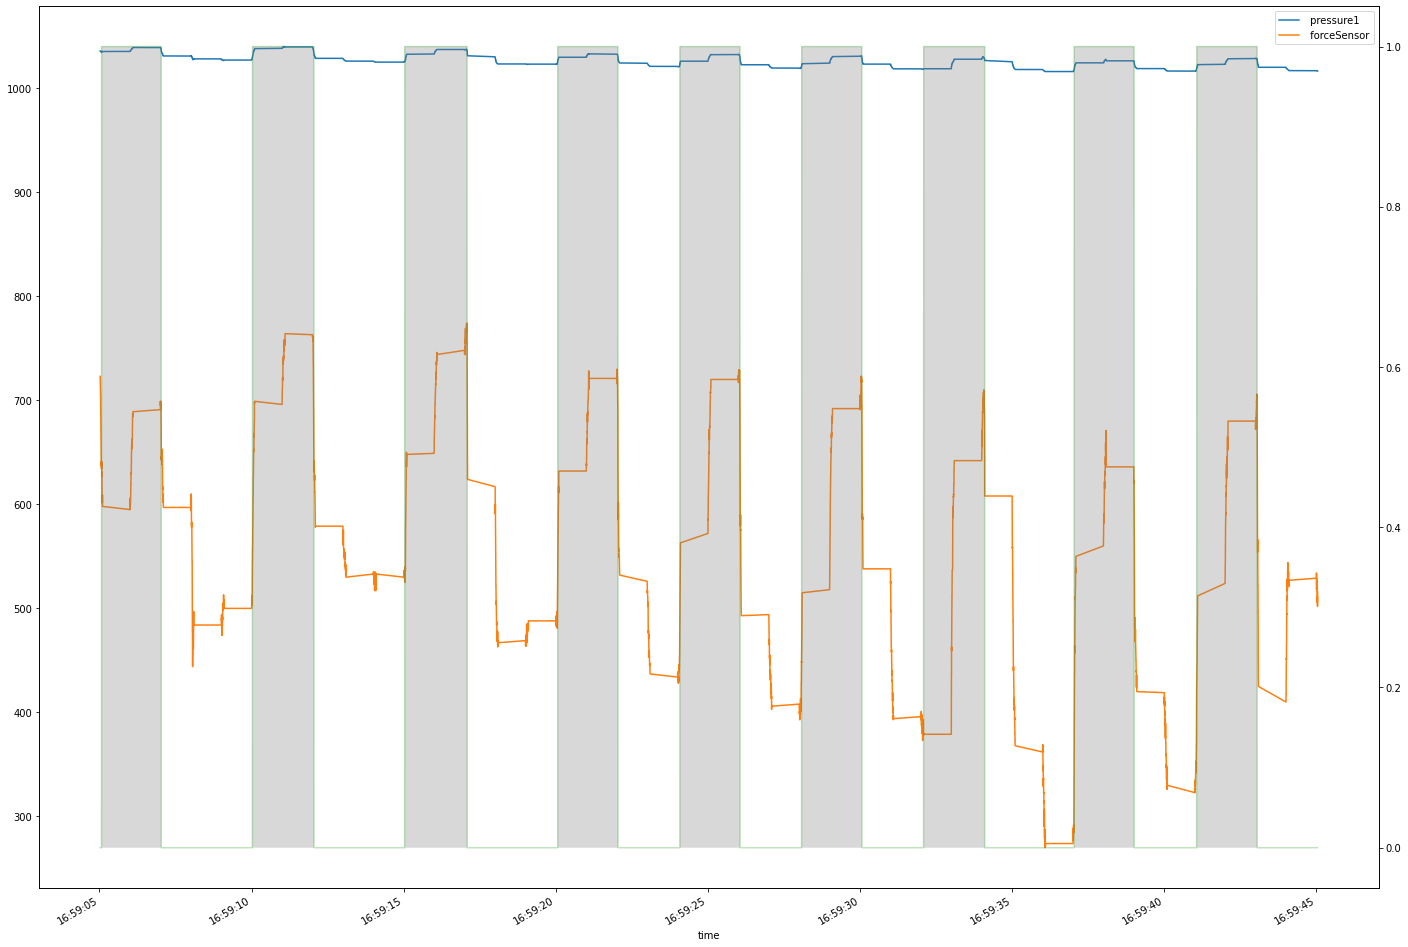

In [26]:
create_graph(file_name='force-sensor-experiments/pressure-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure1', ' forceSensor'],
             secondary_column=' button'
             )